Data Visualization of Cifar-10 and Fashion MNIST

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torchvision
import torchvision.transforms as transforms

# Load Fashion MNIST and CIFAR-10 datasets
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Load and preprocess Fashion MNIST
trainset_fm = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset_fm = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Load and preprocess CIFAR-10
trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Perform PCA for Fashion MNIST and CIFAR-10
def perform_pca(data):
    # Flatten and standardize the data
    data = data.reshape(data.shape[0], -1)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Apply PCA
    pca = PCA(n_components=2)  # You can adjust the number of components
    data_pca = pca.fit_transform(data_scaled)

    return data_pca

# Visualize Fashion MNIST and CIFAR-10 with PCA
data_pca_fm = perform_pca(trainset_fm.data)
data_pca_cifar = perform_pca(trainset_cifar.data)

# Create scatter plots for both datasets
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca_fm[:, 0], data_pca_fm[:, 1], c=trainset_fm.targets, cmap='rainbow')
plt.title('Fashion MNIST PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


plt.tight_layout()
plt.show()

# Calculate the correlation between principal components
corr_matrix = np.corrcoef(data_pca_fm.T, data_pca_cifar.T)
print("Correlation Matrix between Fashion MNIST and CIFAR-10 Principal Components:")
print(corr_matrix)

ANSWER FOR 3.1

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt


In [ ]:
def load_and_preprocess_dataset(dataset_name):
    if dataset_name == "FashionMNIST":
        # Load Fashion MNIST dataset from scikit-learn's datasets
        mnist = fetch_openml("Fashion-MNIST")
        X, y = mnist.data.to_numpy(), mnist.target.to_numpy()


    # Split the dataset into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=check_random_state(0))

    # Normalize the data using StandardScaler
    # rescale data between 0 - 1.0
    X_train = X_train/X_train.max()
    X_test = X_test/X_test.max()

# one-hot encode train (y_train) and test (y_test) set labels
    y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
    y_train[np.arange(Y_train.size),Y_train.astype(np.int)] = 1.0

    y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
    y_test[np.arange(Y_test.size),Y_test.astype(np.int)] = 1.0
    return X_train, y_train, X_test, y_test

# Example usage for Fashion MNIST
X_train, y_train, X_test, y_test = load_and_preprocess_dataset("FashionMNIST")

XAVIER INITIALIZATION

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Xavier Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size + size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size + self.output_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db


    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]
        loss_history = []
        acc_history = []
        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.1, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

Gaussian Initialization

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

    # Gaussian initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=1
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size

        self.weights.append(np.random.normal(0,1,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))


    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.1, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

ZERO INITIALIZATION

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

    # Zeros initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            self.weights.append(np.zeros((prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size

        self.weights.append(np.zeros((prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))



    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

UNIFORM INITIALIZATION

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

    # Uniform initialization between [-1, 1]
        prev_size = self.input_size
        for size in self.hidden_sizes:
            self.weights.append(np.random.uniform(-1, 1, (prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size

        self.weights.append(np.random.uniform(-1, 1, (prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))




    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

KAIMING INITIALIZATION

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()



    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Kaiming Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))





    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.1, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

ANSWER FOR 3.2

NUMBER OF LAYERS=0

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()



    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        if self.hidden_sizes==0:
          sigma=np.sqrt(2. /(self.input_size))
          self.weights.append(np.random.normal(0,sigma,(self.input_size, self.output_size)))
          self.biases.append(np.zeros((1, self.output_size)))
          return

        #Kaiming Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))





    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

NUMBER OF LAYERS=1

In [ ]:

model=MLP(784,[128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

NUMBER OF LAYERS=2

In [ ]:

model=MLP(784,[128,128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

ANSWER FOR 3.3

EXPERIMENT ON LEAKY RELU

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()



    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Kaiming Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))





    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.leaky_relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.leaky_relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def leaky_relu(self, z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)

    def leaky_relu_derivative(self, z, alpha=0.01):
        return np.where(z > 0, 1, alpha)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128,128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

EXPERIMENT ON SOFTPLUS ACTIVATION FUNCTION

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()



    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Kaiming Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))





    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.softplus(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.softplus_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def softplus(self, z):
        return np.log(1 + np.exp(z))

    def softplus_derivative(self, z):
        return 1 / (1 + np.exp(-z))

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128,128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

ANSWER FOR 3.4

EXPERIMENT ON L2 REGULARIZER

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()
        self.l2_lambda=0.01

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Kaiming Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))





    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = (np.dot(self.a[i].T, self.dz[0]) + self.l2_lambda * self.weights[i]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = (np.dot(self.a[0].T, self.dz[0]) + self.l2_lambda * self.weights[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128,128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

EXPERIMENT ON L1 REGULARIZER

In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()
        self.l1_lambda=0.01

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Kaiming Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))





    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate, l1_lambda=0.01):
        m = X.shape[0]
        self.dz = [self.a[-1] - y]
        for i in reversed(range(1, len(self.weights))):
            dw = np.dot(self.a[i].T, self.dz[0]) / m + l1_lambda * np.sign(self.weights[i]) / m
            db = np.sum(self.dz[0], axis=0) / m
            self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
            self.weights[i] -= learning_rate * dw
            self.biases[i] -= learning_rate * db

    # Update first layer weights
        dw = np.dot(self.a[0].T, self.dz[0]) / m + l1_lambda * np.sign(self.weights[0]) / m
        db = np.sum(self.dz[0], axis=0) / m
        self.weights[0] -= learning_rate * dw
        self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128,128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

ANSWER FORO 3.5

EXPERIMENT ON UNNORMALIZED IMAGES

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# Function to load and preprocess the datasets
def load_and_preprocess_dataset(dataset_name):
    if dataset_name == "FashionMNIST":
        # Load Fashion MNIST dataset from scikit-learn's datasets
        mnist = fetch_openml("Fashion-MNIST")
        X, y = mnist.data.to_numpy(), mnist.target.to_numpy()


    # Split the dataset into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=check_random_state(0))


# one-hot encode train (y_train) and test (y_test) set labels
    y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
    y_train[np.arange(Y_train.size),Y_train.astype(np.int)] = 1.0

    y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
    y_test[np.arange(Y_test.size),Y_test.astype(np.int)] = 1.0
    return X_train, y_train, X_test, y_test

# Example usage for Fashion MNIST
X_train, y_train, X_test, y_test = load_and_preprocess_dataset("FashionMNIST")


In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        #Xavier Initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            sigma=np.sqrt(2. /(prev_size + size))
            self.weights.append(np.random.normal(0,sigma,(prev_size, size)))
            self.biases.append(np.zeros((1, size)))
            prev_size = size
        sigma=np.sqrt(2. /(prev_size + self.output_size))
        self.weights.append(np.random.normal(0,sigma,(prev_size, self.output_size)))
        self.biases.append(np.zeros((1, self.output_size)))

    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.leaky_relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.leaky_relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db


    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]
        loss_history = []
        acc_history = []
        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def leaky_relu(self, z, alpha=0.01):
        return np.where(z > 0, z, alpha * z)

    def leaky_relu_derivative(self, z, alpha=0.01):
        return np.where(z > 0, 1, alpha)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)

# Example usage:


In [ ]:

model=MLP(784,[128,128],10)
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)

In [ ]:
y_pred=model.predict(X_test)
print("Testing accuracy:-",model.accuracy(np.argmax(y_test,1),y_pred))

ANSWER FOR 3.6

USING CNN FOR FASHION MNIST

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes for Fashion MNIST

        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.maxpool(x)
        x = self.relu(self.conv2(x))
        x = self.maxpool(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the Fashion MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Initialize and train the CNN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

num_epochs = 50
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
        running_loss += loss.item()

    train_accuracy = 100 * correct_train / total_train
    train_losses.append(running_loss / len(trainloader))
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(trainloader)}, Accuracy: {train_accuracy}")

    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_accuracy = 100 * correct_test / total_test
    test_accuracies.append(test_accuracy)
    print(f"Test Accuracy after epoch {epoch+1}: {test_accuracy}%")

# Plot training loss and accuracies
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(range(num_epochs), train_accuracies, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(range(num_epochs), test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Test Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


**CIFAR-10 dataset**

MLP Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf

from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state

# Function to load and preprocess the datasets
def load_and_preprocess_dataset(dataset_name):
    if dataset_name == "FashionMNIST":
        # Load Fashion MNIST dataset from scikit-learn's datasets
        mnist = fetch_openml("Fashion-MNIST")
        X, y = mnist.data.to_numpy(), mnist.target.to_numpy()
    elif dataset_name == 'CIFAR10':
        cifar = fetch_openml("CIFAR_10")
        X, y = cifar.data.to_numpy(), cifar.target.to_numpy()


    # Split the dataset into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=check_random_state(0))

    # Normalize the data using StandardScaler
    # rescale data between 0 - 1.0
    X_train = X_train/255
    X_test = X_test/255

# one-hot encode train (y_train) and test (y_test) set labels
    y_train = np.zeros((Y_train.size, int(Y_train.max()) + 1))
    y_train[np.arange(Y_train.size),Y_train.astype(np.int)] = 1.0

    y_test = np.zeros((Y_test.size, int(Y_test.max()) + 1))
    y_test[np.arange(Y_test.size),Y_test.astype(np.int)] = 1.0
    return X_train, y_train, X_test, y_test

# Example usage for Fashion MNIST
X_train, y_train, X_test, y_test = load_and_preprocess_dataset("CIFAR10")

# Example usage for CIFAR-10
# X_train, y_train, X_test, y_test = load_and pre-process_dataset("CIFAR10")

# Now you have X_train, y_train, X_test, and y_test ready for classification tasks.


In [ ]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_sizes, output_size):
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.init_weights_and_biases()

    def init_weights_and_biases(self):
        self.weights = []
        self.biases = []

        # Kaiming/He initialization
        prev_size = self.input_size
        for size in self.hidden_sizes:
            self.weights.append(np.random.randn(prev_size, size) * np.sqrt(2. / prev_size))
            self.biases.append(np.zeros((1, size)))
            prev_size = size

        self.weights.append(np.random.randn(prev_size, self.output_size) * np.sqrt(2. / prev_size))
        self.biases.append(np.zeros((1, self.output_size)))




    def forward(self, X):
        self.a = [X]
        for i in range(len(self.hidden_sizes)):
            self.a.append(self.relu(np.dot(self.a[-1], self.weights[i]) + self.biases[i]))
        self.a.append(self.softmax(np.dot(self.a[-1], self.weights[-1]) + self.biases[-1]))
        return self.a[-1]

    def backward(self, X, y, learning_rate):
      m = X.shape[0]
      self.dz = [self.a[-1] - y]
      for i in reversed(range(1, len(self.weights))):
          dw = np.dot(self.a[i].T, self.dz[0]) / m
          db = np.sum(self.dz[0], axis=0) / m
          self.dz.insert(0, np.dot(self.dz[0], self.weights[i].T) * self.relu_derivative(self.a[i]))
          self.weights[i] -= learning_rate * dw
          self.biases[i] -= learning_rate * db

    # Update first layer weights
      dw = np.dot(self.a[0].T, self.dz[0]) / m
      db = np.sum(self.dz[0], axis=0) / m
      self.weights[0] -= learning_rate * dw
      self.biases[0] -= learning_rate * db



    def fit(self, X, y, epochs, learning_rate, batch_size):
        m = X.shape[0]

    # Lists to store loss and accuracy for each epoch
        loss_history = []
        acc_history = []

        for epoch in range(epochs):
            indices = np.arange(m)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, m, batch_size):
                X_mini = X_shuffled[i:i+batch_size]
                y_mini = y_shuffled[i:i+batch_size]
                self.forward(X_mini)
                self.backward(X_mini, y_mini, learning_rate)

            loss = self.cross_entropy_loss(y, self.forward(X))
            acc = self.accuracy(np.argmax(y, axis=1), self.predict(X))
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss}, Accuracy: {acc}')

        # Append loss and accuracy to their respective lists
            loss_history.append(loss)
            acc_history.append(acc)

    # Plotting the training loss
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(epochs), loss_history, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Plotting the training accuracy
        plt.subplot(1, 2, 2)
        plt.plot(range(epochs), acc_history, label='Training Accuracy', color='r')
        plt.title('Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.tight_layout()
        plt.show()


    def predict(self, X):
        return np.argmax(self.forward(X), axis=1)

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_probs = -np.log(y_pred[np.arange(m), y_true.argmax(axis=1)])
        loss = np.sum(log_probs) / m
        return loss

    def softmax(self, z):
        exps = np.exp(z - np.max(z))
        return exps / np.sum(exps, axis=1, keepdims=True)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return (z > 0).astype(float)

    def accuracy(self, y_true, y_pred):
      return np.mean(y_true == y_pred)


In [ ]:
lr=0.1
activation='relu'
model=MLP(32*32*3,[128],10)
import time
start = time.process_time()
model.fit(X_train, y_train, epochs=100, learning_rate=0.01, batch_size=32)
print(time.process_time() - start)

result = model.accuracy(y_test, model.predict(X_test))
print(result)

CNN on CIFAR-10 with SGD optimizer

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [ ]:
#Normalize the data and convert label into one-hot encoded data
def normalize(X):
  return  X/255

X_train_normalized = normalize(X_train)
X_test_normalized = normalize(X_test)

#one hot encoding of categories
def one_hot_encoding(Y):
  return to_categorical(Y)

Y_train_encoded = one_hot_encoding(Y_train)
Y_test_encoded = one_hot_encoding(Y_test)

# print(X_train.shape)
# print(X_train_normalized.shape)
# print(Y_train_encoded)

In [ ]:
#CNN Model
def getModel(optimizer, momentum, beta1, beta2):
  if optimizer == 'SGD':
    opt = tf.keras.optimizers.SGD(
    momentum=momentum
    )
  else :
    opt = tf.keras.optimizers.Adam(beta_1=beta1,beta_2=beta2)

  model = Sequential()
  model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(128, activation ='relu'))
  model.add(Dense(10, activation ='softmax'))
  model.compile(loss ='categorical_crossentropy', optimizer = opt, metrics =['accuracy'])
  return model


In [ ]:
# Model for SGD optimizer with no momentum
model = getModel('SGD',0.0)
print(model.summary())
history = model.fit(X_train_normalized, Y_train_encoded, epochs = 30, verbose=1,validation_data=(X_test_normalized,Y_test_encoded))

In [ ]:
# Model for SGD with varying momentum
# in first iteration I tried with momentum_range = [0.1,0.3,0.5,0.7,0.9,1]
# The best resut was achieved for 0.5 and 0.7 value, hence trying for more granular range

# In 2nd iteration, I tried with momentum_range = [0.4,0.5,0.6,0.7,0.8]
# The best result obtained was for 0.4, 0.5 and 0.6 values.
momentum_range = [0.4,0.5,0.6,0.7,0.8]
result = []
for i in momentum_range :
  model = getModel('SGD', i)
  history = model.fit(X_train_normalized, Y_train_encoded, epochs = 20, verbose=1,validation_data=(X_test_normalized,Y_test_encoded))
  result.append(history.history)


Epoch 1/20
1563/1563 [==============================] - 9s 5ms/step - loss: 1.8969 - accuracy: 0.3118 - val_loss: 1.6726 - val_accuracy: 0.4062
Epoch 2/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5036 - accuracy: 0.4605 - val_loss: 1.4260 - val_accuracy: 0.4970
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.3537 - accuracy: 0.5180 - val_loss: 1.3085 - val_accuracy: 0.5321
Epoch 4/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.2459 - accuracy: 0.5622 - val_loss: 1.2453 - val_accuracy: 0.5633
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1626 - accuracy: 0.5904 - val_loss: 1.1701 - val_accuracy: 0.5880
Epoch 6/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0970 - accuracy: 0.6146 - val_loss: 1.1157 - val_accuracy: 0.6084
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 1.0378 - accuracy: 0.6374 - val_loss: 1.0990 - val_acc

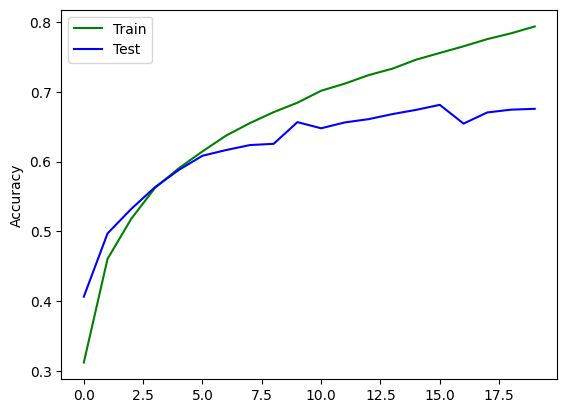

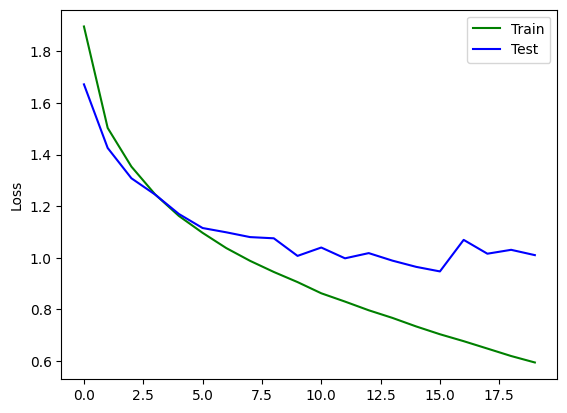

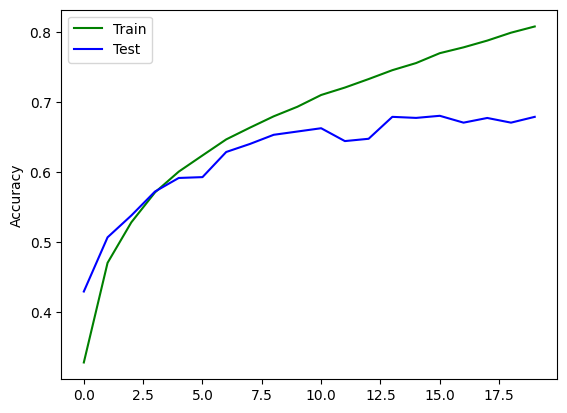

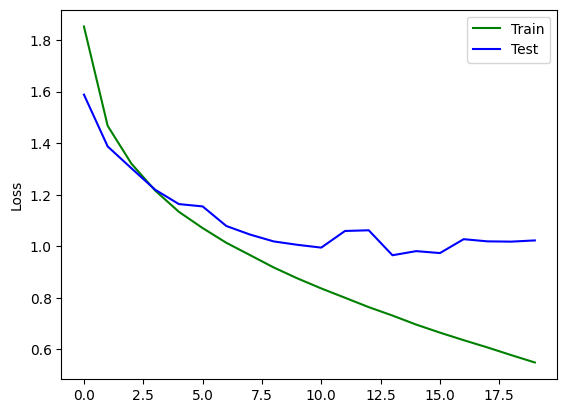

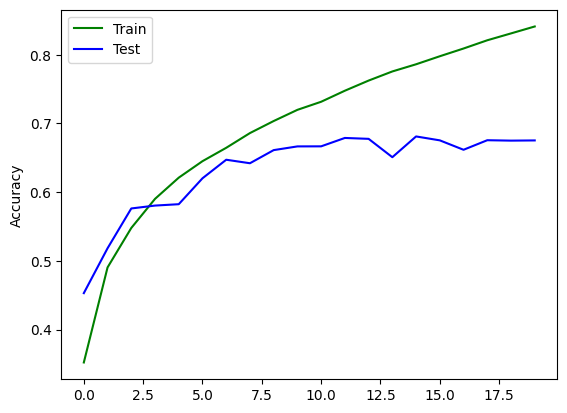

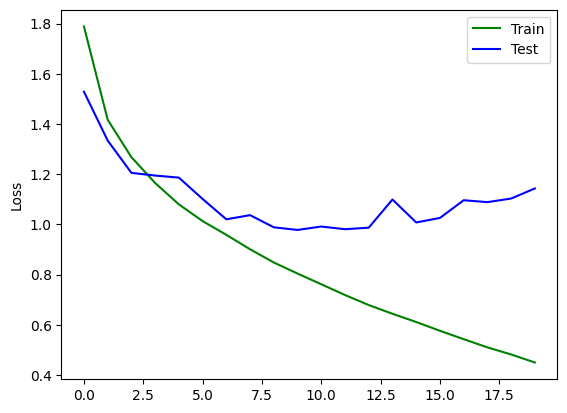

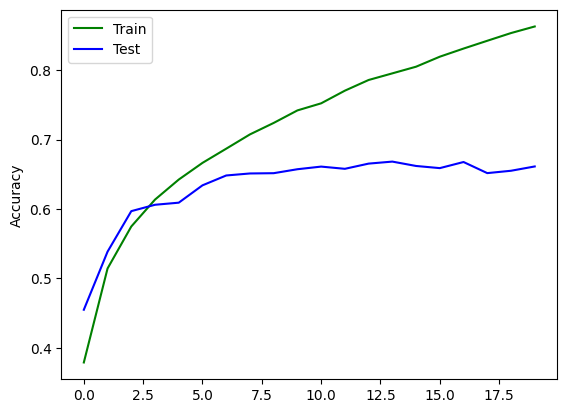

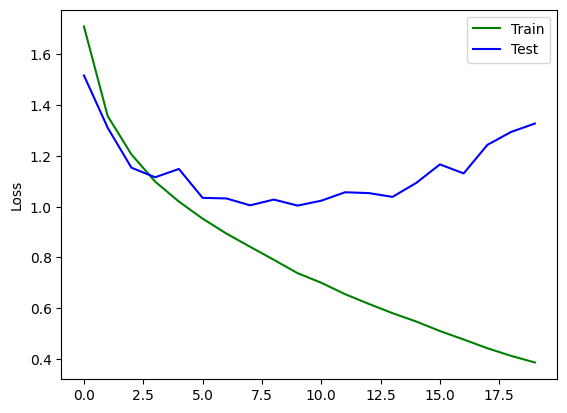

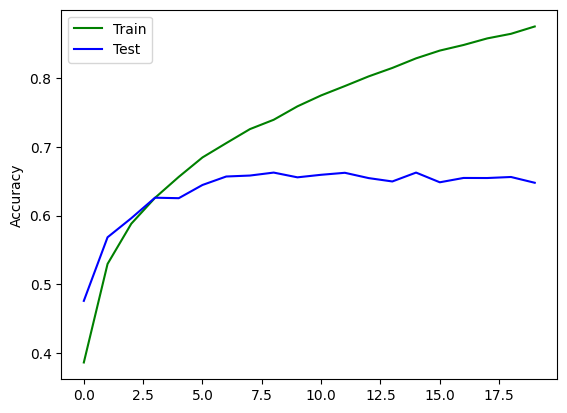

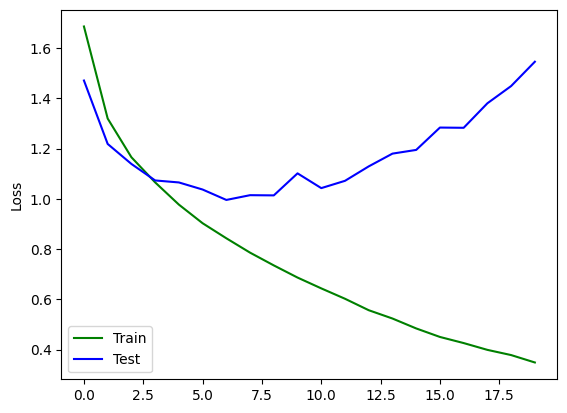

In [ ]:
for i in range(5):
  train_accuracy = result[i]['accuracy']
  test_accuracy = result[i]['val_accuracy']

  train_loss = result[i]['loss']
  test_loss = result[i]['val_loss']
  plt.plot(train_accuracy, label='Train', color='green')
  plt.plot(test_accuracy, label='Test', color='blue')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

  plt.plot(train_loss, label='Train', color='green')
  plt.plot(test_loss, label='Test', color='blue')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()



Adam optimizer

In [ ]:
# Model for Adam

model = getModel('Adam', 0,0.9,0.99)
history = model.fit(X_train_normalized, Y_train_encoded, epochs = 10, verbose=2,validation_data=(X_test_normalized,Y_test_encoded))
print(history.history)

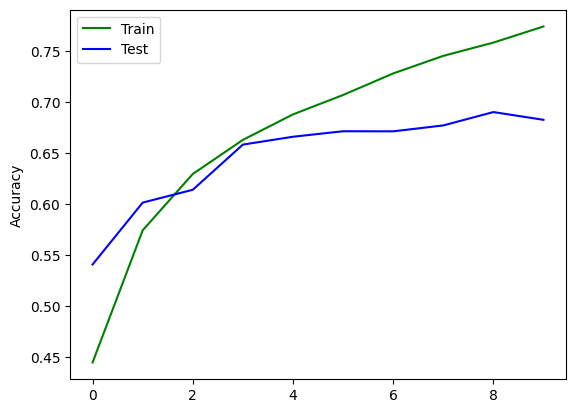

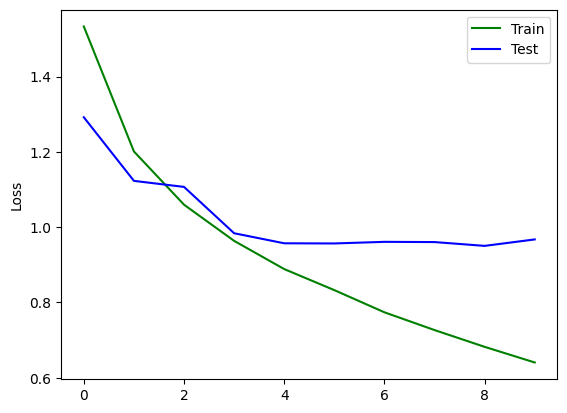

In [ ]:
train_accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
test_loss = history.history['val_loss']

plt.plot(train_accuracy, label='Train', color='green')
plt.plot(test_accuracy, label='Test', color='blue')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(train_loss, label='Train', color='green')
plt.plot(test_loss, label='Test', color='blue')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Model with Adam optimizer and varying momentum value
beta_1 = [0.8, 0.85, 0.9, 0.95]
beta_2 = [0.9, 0.92, 0.94, 0.96, 0.98]

result = []
for i in beta_1 :
  for j in beta_2:
    model = getModel('Adam', 0,i,j)
    history = model.fit(X_train_normalized, Y_train_encoded, epochs = 20, verbose=1,validation_data=(X_test_normalized,Y_test_encoded))
    result.append(history.history)


Epoch 1/10
1563/1563 [==============================] - 18s 5ms/step - loss: 1.5433 - accuracy: 0.4411 - val_loss: 1.3167 - val_accuracy: 0.5352
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2070 - accuracy: 0.5744 - val_loss: 1.1496 - val_accuracy: 0.5925
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0658 - accuracy: 0.6245 - val_loss: 1.0307 - val_accuracy: 0.6430
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9766 - accuracy: 0.6577 - val_loss: 1.0437 - val_accuracy: 0.6422
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9051 - accuracy: 0.6874 - val_loss: 0.9695 - val_accuracy: 0.6691
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8433 - accuracy: 0.7085 - val_loss: 0.9950 - val_accuracy: 0.6605
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7941 - accuracy: 0.7241 - val_loss: 0.9253 - val_accuracy

Effect of Varying depth and width of the neural network

In [ ]:
# Effect of varying depth and width of NN model
# current width = [32,32,128,10]
# current depth = 4

# baseline model
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(beta_1=0.9,beta_2=0.99), metrics =['accuracy'])
history = model.fit(X_train_normalized, Y_train_encoded, epochs = 10, verbose=2,validation_data=(X_test_normalized,Y_test_encoded))
print(history.history)

# add width
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(256, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(beta_1=0.9,beta_2=0.99), metrics =['accuracy'])
history = model.fit(X_train_normalized, Y_train_encoded, epochs = 10, verbose=2,validation_data=(X_test_normalized,Y_test_encoded))
print(history.history)

# add depth
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3),activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(128, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(10, activation ='softmax'))
model.compile(loss ='categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(beta_1=0.9,beta_2=0.99), metrics =['accuracy'])
history = model.fit(X_train_normalized, Y_train_encoded, epochs = 10, verbose=2,validation_data=(X_test_normalized,Y_test_encoded))
print(history.history)

Pretrained ResNet50 and Vgg16 model

In [ ]:
# Pretrained model ResNet50 on CIFAR10
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

# Load a pre-trained ResNet50 model
pretrained_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(32,32, 3))
# pretrained_resnet = tf.keras.applications.VGG16(
#     include_top=False,
#     weights="imagenet",
#     input_shape=(32,32, 3)
# )

# Freeze convolutional layers
for layer in pretrained_resnet.layers:
    layer.trainable = False


# Create the model
model = Sequential()
model.add(pretrained_resnet)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer= RMSprop(learning_rate=2e-5), metrics=['accuracy'])

# Print model summary
# model.summary()

X_train_preprocessed = tf.keras.applications.resnet.preprocess_input(X_train)
X_test_preprocessed = tf.keras.applications.resnet.preprocess_input(X_test)
# Train the model
history = model.fit(X_train_preprocessed, Y_train_encoded, epochs=65,verbose=2, validation_data=(X_test_preprocessed, Y_test_encoded))

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_normalized, Y_test_encoded, verbose=1)


Epoch 1/65
1563/1563 - 22s - loss: 2.8854 - accuracy: 0.1089 - val_loss: 2.2436 - val_accuracy: 0.1619 - 22s/epoch - 14ms/step
Epoch 2/65
1563/1563 - 18s - loss: 2.6921 - accuracy: 0.1318 - val_loss: 2.1116 - val_accuracy: 0.2278 - 18s/epoch - 12ms/step
Epoch 3/65
1563/1563 - 18s - loss: 2.5417 - accuracy: 0.1560 - val_loss: 1.9992 - val_accuracy: 0.2868 - 18s/epoch - 12ms/step
Epoch 4/65
1563/1563 - 18s - loss: 2.3974 - accuracy: 0.1867 - val_loss: 1.9049 - val_accuracy: 0.3377 - 18s/epoch - 11ms/step
Epoch 5/65
1563/1563 - 18s - loss: 2.2888 - accuracy: 0.2108 - val_loss: 1.8181 - val_accuracy: 0.3764 - 18s/epoch - 12ms/step
Epoch 6/65
1563/1563 - 18s - loss: 2.1824 - accuracy: 0.2361 - val_loss: 1.7331 - val_accuracy: 0.4145 - 18s/epoch - 12ms/step
Epoch 7/65
1563/1563 - 18s - loss: 2.0968 - accuracy: 0.2594 - val_loss: 1.6696 - val_accuracy: 0.4401 - 18s/epoch - 12ms/step
Epoch 8/65
1563/1563 - 18s - loss: 2.0148 - accuracy: 0.2828 - val_loss: 1.6091 - val_accuracy: 0.4666 - 18s/ep